In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/NLP_Project_Humor_Offensive

Mounted at /content/drive
/content/drive/MyDrive/NLP_Project_Humor_Offensive


In [ ]:
def delete_noise(sentence):
  noises = ['\'s','\'m','\'ve','n\'t']
  for noise in noises:
    sentence = sentence.replace(noise,'')
    
  return re.sub(r'[^a-zA-Z]', ' ', sentence)

In [ ]:
import pandas as pd
# Load train data
train_data = pd.read_csv('/content/drive/MyDrive/NLP_Project_Humor_Offensive/data/train/train.csv')
# ./train.csv
# /content/drive/MyDrive/NLP_Project_Humor_Offensive/data/train/train.csv

In [ ]:
sentences = train_data['text'].values
labels = train_data['is_humor'].values
offenseve_label = train_data['offense_rating'].values
humor_rating = train_data['humor_rating'].values

sentences

array(["TENNESSEE: We're the best state. Nobody even comes close. *Elevennessee walks into the room* TENNESSEE: Oh shit...",
       'A man inserted an advertisement in the classifieds "Wife Wanted". The next day, he received 1000 of replies, all reading: "You can have mine." Free delivery also available at your door step',
       'How many men does it take to open a can of beer? None. It should be open by the time she brings it to the couch.',
       ...,
       'Today, we Americans celebrate our independence from Britain while planning our escape to Canada.',
       'How to keep the flies off the bride at an Italian wedding Keep a bucket of shit next to her',
       '"Each ounce of sunflower seeds gives you 37% of your daily need for vitamin E" vitamin health'],
      dtype=object)

In [ ]:
!pip install polyglot
!pip install -U git+https://github.com/aboSamoor/polyglot.git@master
!polyglot download LANG:en
!polyglot download embeddings2.en ner2.en

     |████████████████████████████████| 133kB 15.3MB/s 
  Created wheel for polyglot: filename=polyglot-16.7.4-py2.py3-none-any.whl size=52557 sha256=54b3a5dd1c8acd81e1ba1ab5fd0318614b7a4f1e37caf345eee745326529b969
  Stored in directory: /root/.cache/pip/wheels/5e/91/ef/f1369fdc1203b0a9347d4b24f149b83a305f39ab047986d9da
Successfully built polyglot
  Cloning https://github.com/aboSamoor/polyglot.git (to revision master) to /tmp/pip-req-build-7s2y40gv
  Running command git clone -q https://github.com/aboSamoor/polyglot.git /tmp/pip-req-build-7s2y40gv
     |████████████████████████████████| 41.4MB 76kB/s 
     |████████████████████████████████| 235kB 54.3MB/s 
  Created wheel for polyglot: filename=polyglot-16.7.4-py2.py3-none-any.whl size=70643 sha256=0d9de6f8f8def365e2420c1403367d181b2cdc85ba9eaaeb7484960e249e1fae
  Stored in directory: /tmp/pip-ephem-wheel-cache-0dvirdss/wheels/42/d9/73/345c7ae8554299ff8b31635d64eb8455fd591385fa734cdbef
  Created wheel for pycld2: filename=pycld2-0.41-

In [ ]:
from polyglot.downloader import downloader
downloader.download("embeddings2.en")
downloader.supported_tasks(lang="en")

[polyglot_data] Downloading package embeddings2.en to
[polyglot_data]     /root/polyglot_data...
[polyglot_data]   Package embeddings2.en is already up-to-date!


['sgns2',
 'unipos',
 'ner2',
 'counts2',
 'embeddings2',
 'uniemb',
 'pos2',
 'sentiment2',
 'tsne2',
 'morph2']

In [ ]:
!polyglot download embeddings2.en

[polyglot_data] Downloading package embeddings2.en to
[polyglot_data]     /root/polyglot_data...
[polyglot_data]   Package embeddings2.en is already up-to-date!


In [ ]:
import string
from polyglot.text import Text
import re

In [ ]:
# for sent in text.sentences:
#   print(sent, "\n")
#   for entity in sent.entities:
#     print(entity)

In [ ]:
all_IOB = []
is_IOB = []
for sen in sentences:
  s = delete_noise(sen)
  s = ''.join(x for x in sen if x.isprintable())
  s = re.sub(r'[^a-zA-Z ]', '', s)
  IOB = []
  # sen = ''.join(x for x in s if x.isprintable())
  # print(sen)
  text = Text(s,hint_language_code='en')
  for entities in text.entities:
    for e in entities:
      IOB.append(e)
  is_IOB.append(1 if len(IOB) != 0 else 0)
  all_IOB.append(IOB)


In [ ]:
score_offen=[]
scor2 = []
for i in range(len(is_IOB)):
  if is_IOB[i]:
    score_offen.append(offenseve_label[i])
  else:
    scor2.append(offenseve_label[i])

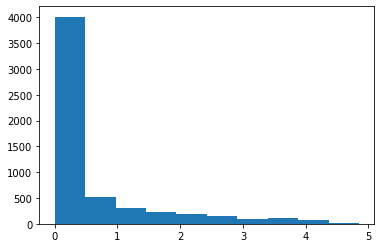

In [ ]:
import matplotlib.pyplot as plt
from numpy import array
gn = array(scor2)
plt.hist(gn.astype('float'))
plt.show()

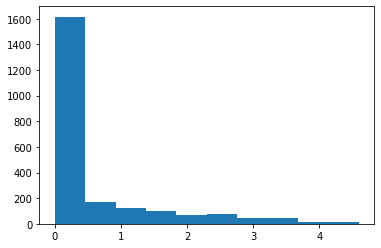

In [ ]:
import matplotlib.pyplot as plt
from numpy import array
gn = array(score_offen)
plt.hist(gn.astype('float'))
plt.show()

In [ ]:
set(labels)

{0, 1}

In [ ]:
score_offen=[]
scor2 = []
for i in range(len(is_IOB)):
  if labels[i] == 1:
    score_offen.append(offenseve_label[i])
  elif labels[i] == 0:
    scor2.append(offenseve_label[i])

In [ ]:
len(scor2)

3068

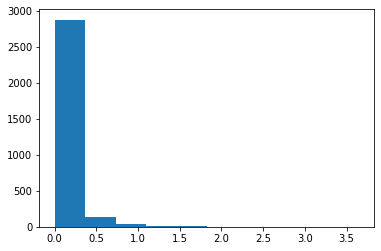

In [ ]:
import matplotlib.pyplot as plt
from numpy import array
gn = array(scor2)
plt.hist(gn.astype('float'))
plt.show()

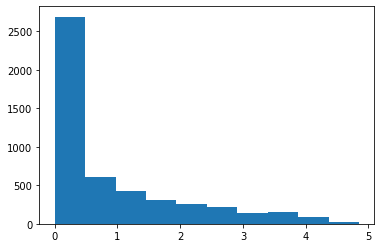

In [ ]:
import matplotlib.pyplot as plt
from numpy import array
gn = array(score_offen)
plt.hist(gn.astype('float'))
plt.show()

In [ ]:
i = 289
text = Text(sentences[i],hint_language_code='en')
print(sentences[i])
print(all_IOB[i])
print(is_IOB[i])
print(offenseve_label[i])
# all
text.entities

type(sentences)

Angels and Demons having a drink together??!!! WTF!!! bad idea suck Sandwich
['Sandwich']
1
0.5


numpy.ndarray

# **PreProcessing**

# **TFIdf**

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
import copy
import nltk
nltk.download('stopwords')
from nltk import PorterStemmer
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.lancaster import LancasterStemmer
lancaster_stemmer = LancasterStemmer()
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
# for sen in sentences:
#   sentencesT=word_tokenize(sen)

# type(sentencesT)

In [ ]:
# clean_data = copy.deepcopy(sentences)
# def listToString(s):  
    
#     # initialize an empty string 
#     str1 = ""  
    
#     # traverse in the string   
#     for ele in s:  
#         str1 += ele   
    
#     # return string   
#     return str1  
# sentences=listToString(sentences)
# # bagOfWordsA = sentences.split(' ')
# # uniqueWords = set(bagOfWordsA)

## **StopWords**

In [ ]:


def delete_extra_words(massage):
    no_punc = [char for char in massage if char not in string.punctuation]
    no_punc = ''.join(no_punc)
    no_stopwords = [char for char in no_punc.split(
    ) if char.lower() not in stopwords.words('english')]
    all_alpha = [word for word in no_stopwords if word.isalpha()]
    ps = PorterStemmer()
    no_similar_word = [ps.stem(word) for word in all_alpha]
    acceptable_length_word = [
        word for word in no_similar_word if len(word) >= 2]
    return acceptable_length_word



In [ ]:
# delete_extra_words(sentences)
# delete_extra_words(sentencesT)

In [ ]:
# uniqueWords = set(sentencesT)
# numOfWordsA = dict.fromkeys(uniqueWords, 0)
# for word in sentencesT:
#     numOfWordsA[word] += 1

In [ ]:
# def computeTF(wordDict, sentencesT):
#     tfDict = {}
#     bagOfWordsCount = len(sentencesT)
#     for word, count in wordDict.items():
#         tfDict[word] = count / float(bagOfWordsCount)
#     return tfDict


In [ ]:

# tfA = computeTF(numOfWordsA, sentencesT)

In [ ]:
# def computeIDF(documents):
#     import math
#     N = len(documents)
    
#     idfDict = dict.fromkeys(documents[0].keys(), 0)
#     for document in documents:
#         for word, val in document.items():
#             if val > 0:
#                 idfDict[word] += 1
    
#     for word, val in idfDict.items():
#         idfDict[word] = math.log(N / float(val))
#     return idfDict

# idfs = computeIDF([numOfWordsA])

In [ ]:
# def computeTFIDF(tfBagOfWords, idfs):
#     tfidf = {}
#     for word, val in tfBagOfWords.items():
#         tfidf[word] = val * idfs[word]
#     return tfidf

# tfidfA = computeTFIDF(tfA, idfs)
# df = pd.DataFrame([tfidfA])

# df

In [ ]:
# vectorizer = TfidfVectorizer()
# vectors = vectorizer.fit_transform([sentences])
# feature_names = vectorizer.get_feature_names()
# dense = vectors.todense()
# denselist = dense.tolist()
# df = pd.DataFrame(denselist, columns=feature_names)
# df

## **TFIdf 2**

In [ ]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.lancaster import LancasterStemmer
lancaster_stemmer = LancasterStemmer()
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()
import re
import nltk
nltk.download('punkt', 'stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.lancaster import LancasterStemmer
lancaster_stemmer = LancasterStemmer()
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()
import tqdm
import pandas as pd
import pandas as pd
import numpy as np
from tqdm import tqdm
import copy

[nltk_data] Downloading package punkt to stopwords...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
def take_data_to_shower(sent):
    noises = ['URL', '@USER', '\'ve', 'n\'t', '\'s', '\'m']

    for noise in noises:
        sent = sent.replace(noise, '')

    return re.sub(r'[^a-zA-Z]', ' ', sent)


def tokenize(tweet):
    lower_tweet = tweet.lower()
    return word_tokenize(lower_tweet)


def remove_stop_words(tokens):
    clean_tokens = []
    stopWords = set(stopwords.words('english'))
    for token in tokens:
        if token not in stopWords:
            if token.replace(' ', '') != '':
                if len(token) > 1:
                    clean_tokens.append(token)
    return clean_tokens


def stem_and_lem(tokens):
    clean_tokens = []
    for token in tokens:
        token = wordnet_lemmatizer.lemmatize(token)
        token = lancaster_stemmer.stem(token)
        if len(token) > 1:
            clean_tokens.append(token)
    return clean_tokens

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [ ]:

# tqdm.pandas(desc="Cleaning Data Phase I...")
# clean_tweets = copy.deepcopy(train_data)
# clean_tweets['text'] = train_data['text'].apply(take_data_to_shower)

# tqdm.pandas(desc="Tokenizing Data...")
# clean_tweets['tokens'] = clean_tweets['text'].apply(tokenize)

# tqdm.pandas(desc="Cleaning Data Phase II...")
# clean_tweets['tokens'] = clean_tweets['tokens'].apply(remove_stop_words)

# tqdm.pandas(desc="Stemming And Lemmatizing")
# clean_tweets['tokens'] = clean_tweets['tokens'].apply(stem_and_lem)

# text_vector = clean_tweets['tokens'].tolist()


In [ ]:
def convToSen(s):
  return ' '.join(s)

# embeddings

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

def tfid(text_vector):
    vectorizer = TfidfVectorizer()
    untokenized_data =[' '.join(tweet) for tweet in tqdm(text_vector, "Vectorizing...")]
    vectorizer = vectorizer.fit(untokenized_data)
    vectors = vectorizer.transform(untokenized_data).toarray()
    return vectors
  
def get_vectors(vectors, labels, keyword):
    if len(vectors) != len(labels):
        print("Unmatching sizes!")
        return
    result = list()
    for vector, label in zip(vectors, labels):
            result.append(vector)
    return result

In [ ]:
import string

import nltk
import pandas as pd
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn import metrics, svm
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB

nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
def delete_extra_words(massage):
    no_punc = [char for char in massage if char not in string.punctuation]
    no_punc = ''.join(no_punc)
    no_stopwords = [char for char in no_punc.split(
    ) if char.lower() not in stopwords.words('english')]
    all_alpha = [word for word in no_stopwords if word.isalpha()]
    ps = PorterStemmer()
    no_similar_word = [ps.stem(word) for word in all_alpha]
    acceptable_length_word = [
        word for word in no_similar_word if len(word) >= 2]
    return acceptable_length_word

In [ ]:
# gain a frequency of each word form each document
# each word is feature
# messages_bow is a model for it base on our massages
messages_bow = CountVectorizer(analyzer=delete_extra_words).fit_transform(train_data['text'])

print('Shape of Sparse Matrix: ', messages_bow.shape)
print('Amount of non-zero occurences:', messages_bow.nnz)

sparsity = (100.0 * messages_bow.nnz / (messages_bow.shape[0] * messages_bow.shape[1]))
print('sparsity:{}'.format(sparsity))
tfidf_transformer = TfidfTransformer().fit(messages_bow)
# each word has wight in data instead of frequency :)
messages_tfidf = tfidf_transformer.transform(messages_bow)

Shape of Sparse Matrix:  (8000, 10376)
Amount of non-zero occurences: 82223
sparsity:0.09905430801850425


In [ ]:
print(messages_tfidf)
cc =messages_tfidf.toarray()


# print(tfidf_transformer.vocabulary_)

  (0, 9949)	0.1911635766395896
  (0, 9133)	0.6287677932392679
  (0, 8705)	0.2273566077025346
  (0, 8230)	0.23009779209027728
  (0, 7789)	0.22802375946265982
  (0, 6277)	0.25668709767037984
  (0, 3116)	0.1911635766395896
  (0, 2952)	0.3565269488843123
  (0, 1913)	0.18123809419669382
  (0, 1826)	0.23795375886279388
  (0, 967)	0.19039889498703055
  (0, 81)	0.23709169428507276
  (1, 10114)	0.14168157420624908
  (1, 9964)	0.14940344805701614
  (1, 8733)	0.24116122595402584
  (1, 7603)	0.19950229305822748
  (1, 7471)	0.24656802503352773
  (1, 7442)	0.20511785514590178
  (1, 6237)	0.1999048280404535
  (1, 5866)	0.24656802503352773
  (1, 5556)	0.1623967757221954
  (1, 4678)	0.33857790805593463
  (1, 3590)	0.21232445809734107
  (1, 2720)	0.2085432400055755
  (1, 2452)	0.27330582131000675
  :	:
  (7996, 627)	0.7081987097586726
  (7997, 9308)	0.24307763093972215
  (7997, 6930)	0.3389730270843384
  (7997, 4620)	0.3865613138150907
  (7997, 3079)	0.37076382293239485
  (7997, 1574)	0.3321717134019291

In [ ]:
print("Shape of test matrix after BOW : ",messages_bow.shape) 

Shape of test matrix after BOW :  (8000, 10376)


In [ ]:
len(messages_tfidf.toarray()[0])

10376

In [ ]:
def get_vectors(vectors, labels):
    if len(vectors) != len(labels):
        print("Unmatching sizes!")
        return
    result = list()
    for vector, label in zip(vectors, labels):
      # print(vector, label)
      result.append(vector)
    return result

In [ ]:
vectors_b = get_vectors(messages_tfidf.toarray(), is_IOB) # Numerical Vectors B

In [ ]:
len(vectors_b[0])

10376

In [ ]:
vectors_C = get_vectors(vectors_b, labels)

In [ ]:
len(vectors_C[0])

10376

In [ ]:
labels_c = train_data['offense_rating'].values.tolist()

In [ ]:
# Split Data to train and test
train_vectors, test_vectors, train_labels, test_labels = train_test_split(vectors_C, labels_c, test_size=0.20,random_state=0)

In [ ]:
from sklearn.svm import SVR
regressor = SVR(kernel='rbf')
regressor.fit(train_vectors, train_labels)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [ ]:
acc = regressor.score(test_vectors, test_labels)
svc_pred = regressor.predict(test_vectors)


ValueError: ignored

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, mean_squared_error,r2_score

In [ ]:
svc_pred = [v*5 for v in svc_pred]
svc_pred = [v/5 for v in svc_pred]
svc_pred

In [ ]:
max(svc_pred)

87.1673444640135

In [ ]:
min(svc_pred)

-13.149135550392149

In [ ]:
RMSE = mean_squared_error(test_labels, svc_pred)
r2_score(test_labels, svc_pred)
print('Root Mean Square Error: ', RMSE)


Root Mean Square Error:  0.5704447245079305
